# ZADANIE 1.  
Porównać w języku python reprezentację bitową liczby 1/3 dla `np.float16`, `np.float32`, `np.float64` oraz liczby, 
która jest inicjalizowana jako `np.float16`, a potem rzutowana na `np.float64`.


In [90]:
import numpy as np

print(
    f"np.float16(1/3)            = {np.binary_repr(np.float16(1/3).view(np.int16), width=16)}  ({np.float16(1/3)})\n"
    f"np.float32(1/3)            = {np.binary_repr(np.float32(1/3).view(np.int32), width=32)}  ({np.float32(1/3)})\n"
    f"np.float64(1/3)            = {np.binary_repr(np.float64(1/3).view(np.int64), width=64)}  ({np.float64(1/3)})\n"
    f"np.float16(1/3) -> float64 = {np.binary_repr(np.float16(1/3).astype(np.float64).view(np.int64), width=64)}  ({np.float16(1/3).astype(np.float64)})"
)

np.float16(1/3)            = 0011010101010101  (0.333251953125)
np.float32(1/3)            = 00111110101010101010101010101011  (0.3333333432674408)
np.float64(1/3)            = 0011111111010101010101010101010101010101010101010101010101010101  (0.3333333333333333)
np.float16(1/3) -> float64 = 0011111111010101010101000000000000000000000000000000000000000000  (0.333251953125)


**WNIOSKI**  
   
Liczba 1/3 ma różną reprezentację bitową w zależności od formatu, co wynika z różnej liczby bitów dostępnych na mantysę i cechę. Im większy format (np. float64), tym dokładniejsze przybliżenie tej liczby. Natomiast liczba zadeklarowana jako float16 i rzutowana na float64 zachowuje precyzję float16, ale jest przedstawiona w 64 bitach — zatem jest to mniej dokładne przybliżenie zapisane na większej liczbie bitów. Pokazuje to, że rzutowanie do większego typu nie poprawia dokładności, jeśli pierwotna wartość była zapisana z mniejszą precyzją.

# ZADANIE 2.  
Zbadać, jak zmienia się odległość między kolejnymi liczbami zmiennoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka python. 
Narysować wykres używając `matplotlib.pyplot` zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

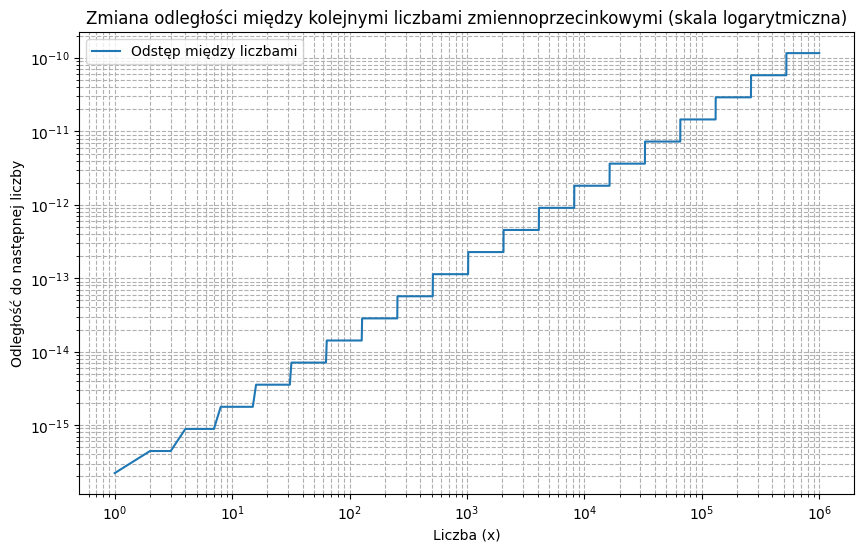

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generujemy próbki liczb z zakresu od 1.0 do 1e6
x = np.linspace(1.0, 1e6, num=1000000)

# Obliczamy różnicę między daną liczbą a następną reprezentowalną liczbą
gaps = np.nextafter(x, np.inf) - x

# Rysujemy wykres
plt.figure(figsize=(10, 6))
plt.plot(x, gaps, label="Odstęp między liczbami")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Liczba (x)")
plt.ylabel("Odległość do następnej liczby")
plt.title("Zmiana odległości między kolejnymi liczbami zmiennoprzecinkowymi (skala logarytmiczna)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

**WNIOSKI ZAD 2.**  
  
Na wykresie widać, że odległość między kolejnymi liczbami zmiennoprzecinkowymi rośnie wraz ze wzrostem wartości x. Dla małych liczb różnice między kolejnymi wartościami są bardzo małe, niemal niewidoczne, natomiast dla większych liczb stają się coraz większe. Jest to bezpośrednia konsekwencja sposobu, w jaki liczby są przechowywane w standardzie IEEE 754. Liczby zmiennoprzecinkowe mają stałą względną precyzję, co oznacza, że im większa wartość, tym większy krok między kolejnymi reprezentowalnymi wartościami.

Wykres ma charakter „schodkowy”, ponieważ odstępy nie zmieniają się płynnie, lecz skokowo – po osiągnięciu pewnej wartości nagle podwajają się. Dzieje się tak, ponieważ liczby zmiennoprzecinkowe są zapisywane w postaci 1.mantysa * 2^(cecha), a zmiana wartości bitu cechy (exponent) skutkuje zwiększeniem rozmiaru kroku. 

• Na początku (dla małych liczb) odstępy są bardzo małe, dlatego wykres wygląda jak linia ciągła.  
• Dla dużych wartości (np. powyżej 1000) liczby mogą być zapisane tylko w coraz większych odstępach → widzimy „schody” na wykresie.  
• Dlaczego „schody”? Bo kiedy przekraczamy nową potęgę dwójki (np. z 1024 na 2048), nagle odstęp podwaja się.  


# ZADANIE 3.  
Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main() {
    float x = 1e-32;

    printf("Liczba zmiennoprzecinkowa, cecha (exponent) i mantysa (fraction):\n");

    while (x > 0) {
        printf("x = %e\t", x);
        gsl_ieee_printf_float(&x);
        printf("\n");
        x /= 2.0;
    }

    return 0;
}

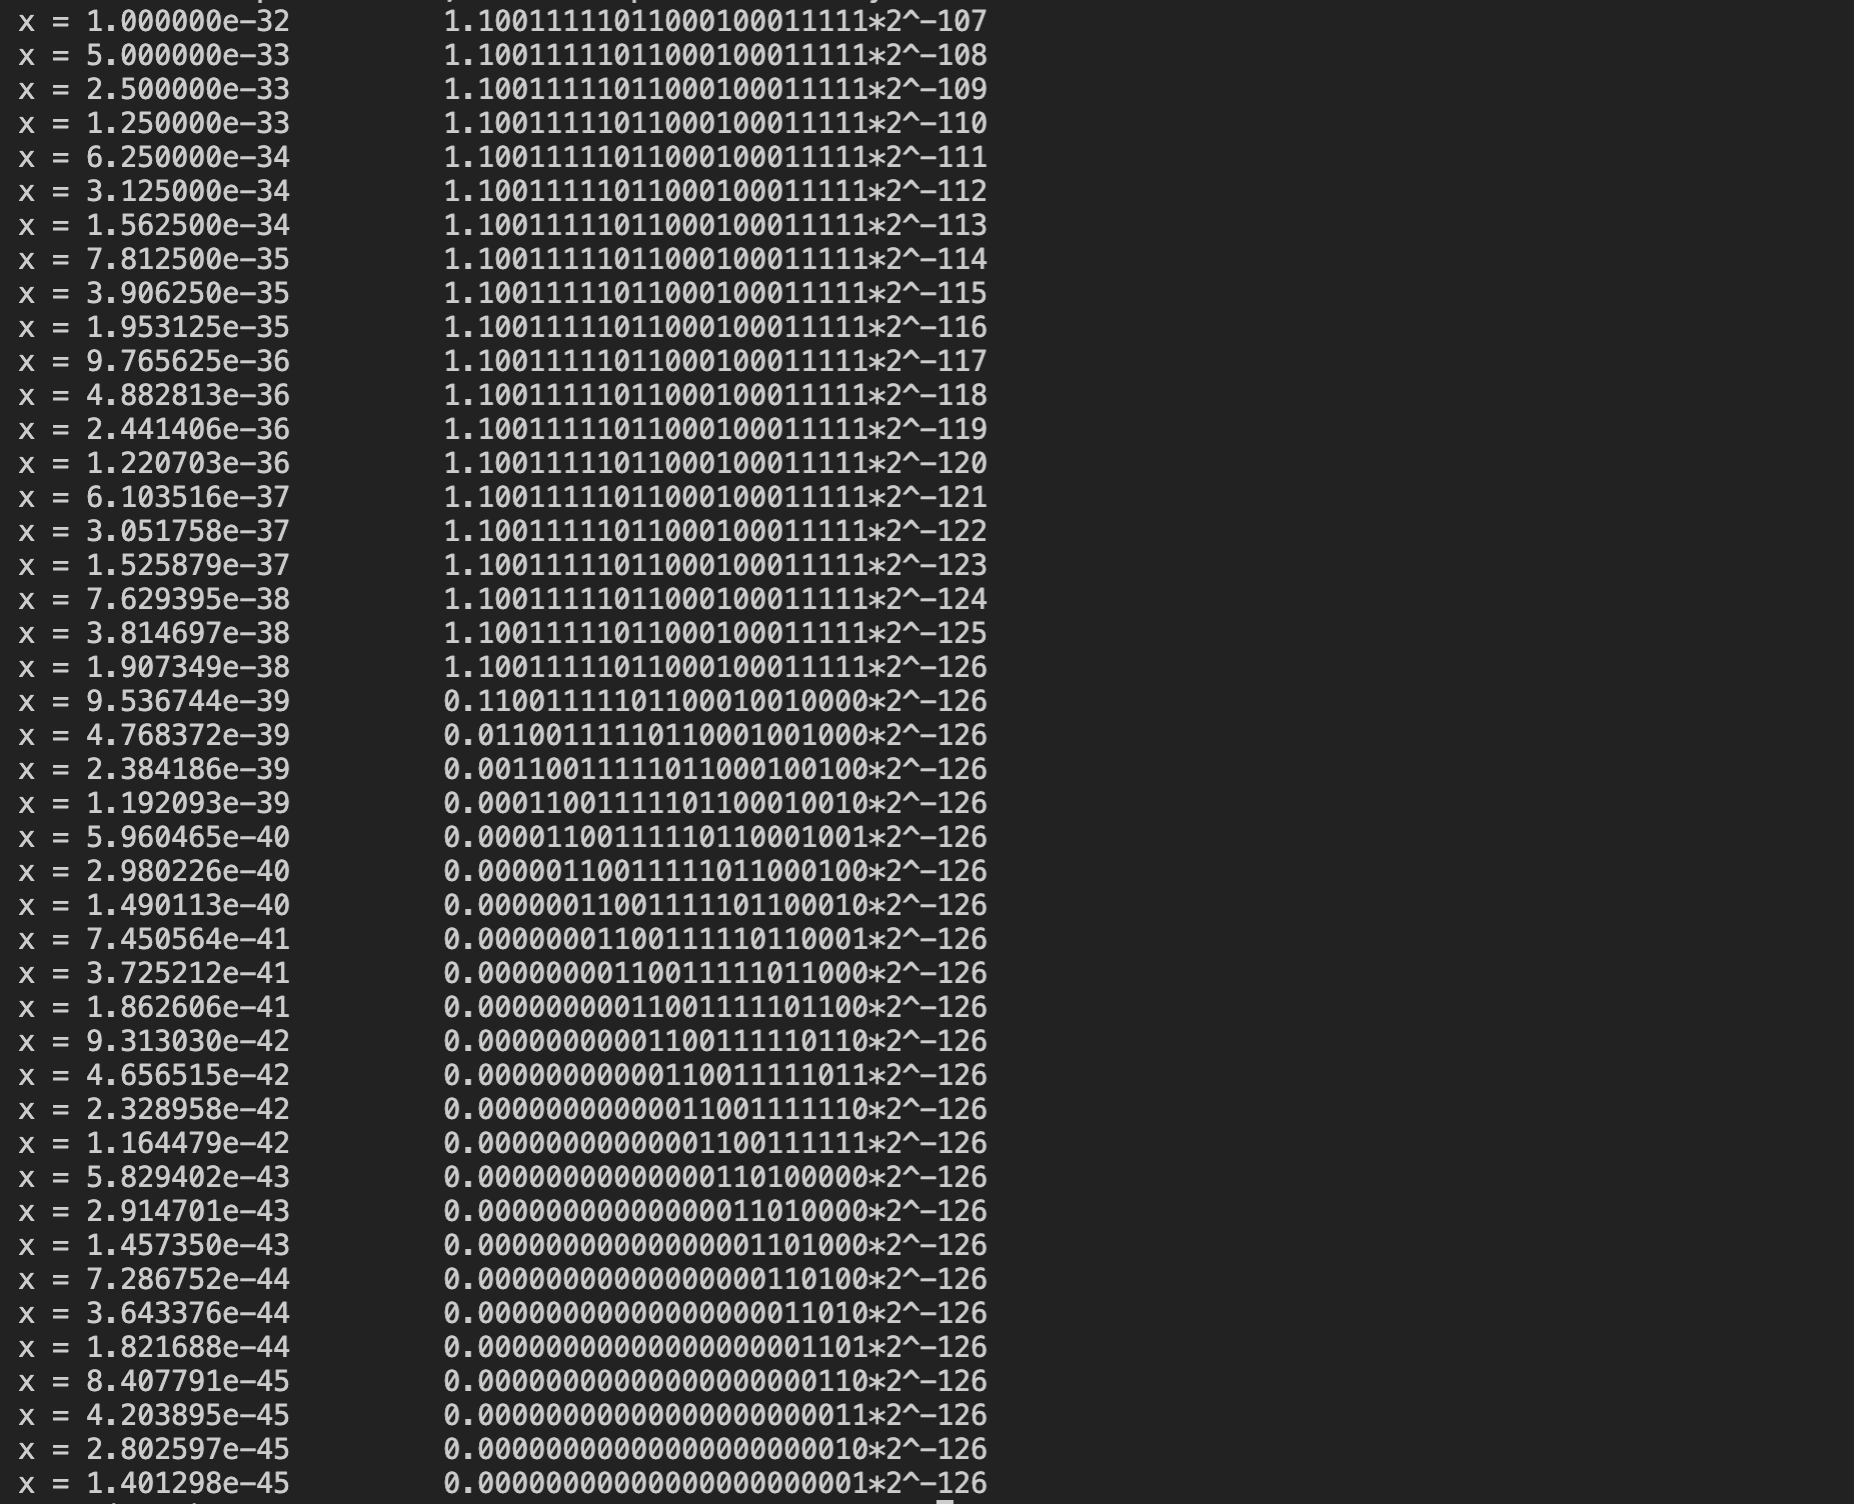

**WNIOSKI**  
Początkowo każda liczba ma znormalizowaną postać, co oznacza, że jej mantysa zaczyna się od 1. i jest mnożona przez odpowiednią potęgę dwójki. W miarę dzielenia liczby przez dwa cecha zmniejsza się, co skutkuje przesunięciem wartości do coraz niższych potęg dwójki. Jednak w pewnym momencie cecha osiąga swój minimalny możliwy poziom, w przypadku float jest to -126. Od tego momentu liczba przestaje być znormalizowana – mantysa stopniowo maleje, a cecha pozostaje stała. Dzieje się tak, ponieważ IEEE 754 przewiduje reprezentację liczb subnormalnych (denormalized), które pozwalają płynnie przejść do zera zamiast gwałtownego przeskoku.  

Kiedy mantysa staje się coraz mniejsza, tracimy precyzję, ponieważ coraz mniej bitów jest używanych do zapisu wartości. W końcu mantysa znika całkowicie i liczba staje się zerem. Warto zauważyć, że ten punkt, w którym mantysa przestaje być znormalizowana, zależy od typu liczby – dla float dzieje się to przy exp = -126, ale dla double byłoby to exp = -1022. Oznacza to, że typ double może reprezentować mniejsze wartości zanim przejdzie do liczb subnormalnych, a jeszcze większą precyzję zachowują typy rozszerzone, takie jak long double. To pokazuje, że ograniczona liczba bitów w reprezentacji zmiennoprzecinkowej sprawia, że im mniejsza liczba, tym większe ryzyko utraty precyzji, aż do całkowitego zaniku wartości.  

# ZADANIE 4.
Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Wszystkie punkty przedstawić w postaci notatnika Jupytera w pythonie.

## **1. Analiza algorytmu niestabilnego numerycznie**

Algorytm oblicza funkcję:

$$
f(x) = \frac{1 - \cos(x)}{x^2}
$$

dla bardzo małych wartości $ x $. W celu analizy zachowania tej funkcji, rozwiniemy $ \cos(x) $ w szereg Taylora wokół $ x = 0 $:

$$
\cos(x) \approx 1 - \frac{x^2}{2} + \mathcal{O}(x^4)
$$

Podstawiając to do funkcji $ f(x) $:

$$
1 - \cos(x) \approx 1 - \left(1 - \frac{x^2}{2} + \mathcal{O}(x^4) \right) = \frac{x^2}{2} + \mathcal{O}(x^4)
$$

Podzielmy obie strony przez $ x^2 $:

$$
f(x) = \frac{\frac{x^2}{2} + \mathcal{O}(x^4)}{x^2} = \frac{1}{2} + \mathcal{O}(x^2)
$$

Dla **małych wartości** $ x $, funkcja powinna zbiegać do $ \frac{1}{2} $.  

Jednak na wykresie, zamiast oczekiwanego wyniku, widzimy **niestabilność i gwałtowne zmiany wartości**, które wynikają z błędów numerycznych spowodowanych **catastrophic cancellation**.

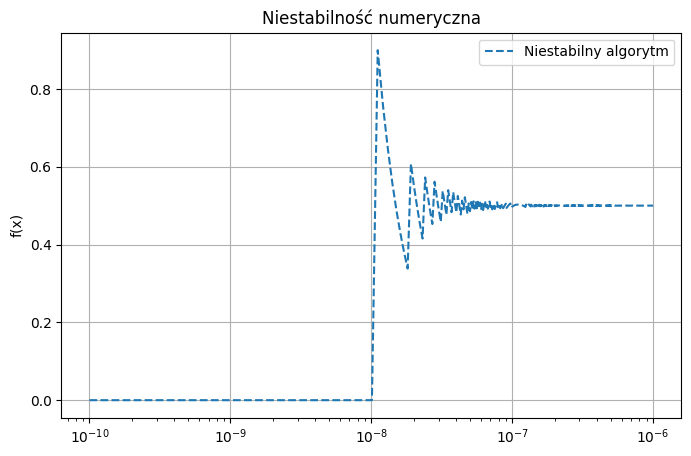

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def unstable_function(x):
    return (1 - np.cos(x)) / x**2

x_values = np.linspace(1e-10, 1e-6, 1000)
unstable_results = unstable_function(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, unstable_results, label='Niestabilny algorytm', linestyle='dashed')
plt.xscale('log')
plt.ylabel('f(x)')
plt.title('Niestabilność numeryczna')
plt.legend()
plt.grid()
plt.show()

In [93]:
print("Test dla bardzo małego x:")
x_test = 1e-10
print(f"1 - cos({x_test}) = {1 - np.cos(x_test)}")
print(f"(1 - cos({x_test})) / {x_test}^2 = {unstable_function(x_test)}")

Test dla bardzo małego x:
1 - cos(1e-10) = 0.0
(1 - cos(1e-10)) / 1e-10^2 = 0.0


## **2. Identyfikacja błędów numerycznych**

### **Źródło błędu numerycznego – catastrophic cancellation**

### **Dlaczego to powoduje błędy?**
Głównym źródłem błędu numerycznego jest **odejmowanie dwóch bardzo bliskich liczb** w liczniku:

$$
1 - \cos(x)
$$

Dla bardzo małych wartości $ x $, funkcja cosinus przyjmuje wartości **niemal równe 1**. W standardzie zmiennoprzecinkowym **IEEE 754** liczby są przechowywane z ograniczoną precyzją (w przypadku **double** mamy **52 bity mantysy**), co oznacza, że po odjęciu dwóch bliskich wartości **wiele znaczących cyfr zostaje utraconych**, co prowadzi do **catastrophic cancellation**.

---

### **Mechanizm powstawania błędu**

Teoretycznie wszystko powinno działać poprawnie, ale numerycznie mamy problem:
- Dla **bardzo małego $ x $** różnica $ 1 - \cos(x) $ staje się **bardzo mała**, np. dla $ x = 10^{-10} $:

  $$
  1 - \cos(10^{-10}) \approx 5 \times 10^{-21}
  $$

- **IEEE 754 ma skończoną precyzję** – w standardzie **double** najmniejsza możliwa różnica między dwiema liczbami (odległość między kolejnymi liczbami zmiennoprzecinkowymi) w tym zakresie może być większa niż wartość $ 1 - \cos(x) $, co prowadzi do **zaokrąglenia wartości do zera**.

- **Catastrophic cancellation** następuje, ponieważ odejmujemy dwie liczby, które są niemal identyczne – tracimy precyzję, ponieważ **większość cyfr znaczących się kasuje**, pozostawiając bardzo niedokładny wynik.

---

### **Konsekwencje**
Błędy wynikają z dwóch czynników:
1. **Catastrophic cancellation** → utrata cyfr znaczących w wyniku odejmowania $ 1 - \cos(x) $.  
2. **Dzielenie przez $ x^2 $** → wzmacnia błąd, ponieważ dzielimy przez małą wartość, co może prowadzić do uzyskania kompletnie błędnych wyników.  

W efekcie dla bardzo małych wartości $ x $ funkcja zwraca **całkowicie błędne wyniki**, a w skrajnych przypadkach wynik może być nawet **równy zeru**.

---

### **Jak poprawić ten błąd?**
Aby uniknąć **catastrophic cancellation**, zamiast $ 1 - \cos(x) $ możemy użyć tożsamości trygonometrycznej:

$$
1 - \cos(x) = 2 \sin^2 \left(\frac{x}{2} \right)
$$

Dzięki temu funkcja przyjmuje postać:

$$
f(x) = \frac{2 \sin^2 (x/2)}{x^2}
$$

Ta wersja jest **znacznie bardziej stabilna numerycznie**, ponieważ:
- **Nie zawiera odejmowania dwóch niemal identycznych wartości**, co eliminuje catastrophic cancellation.  
- **$ \sin(x) $ dla małych wartości $ x $ jest dobrze reprezentowany w IEEE 754**, dzięki czemu unikamy utraty precyzji.  
- **Precyzja obliczeń jest lepiej zachowana**, nawet dla ekstremalnie małych wartości $ x $.  

Dzięki tej poprawce eliminujemy błąd numeryczny i uzyskujemy **dokładne wartości nawet dla bardzo małych $ x $**.

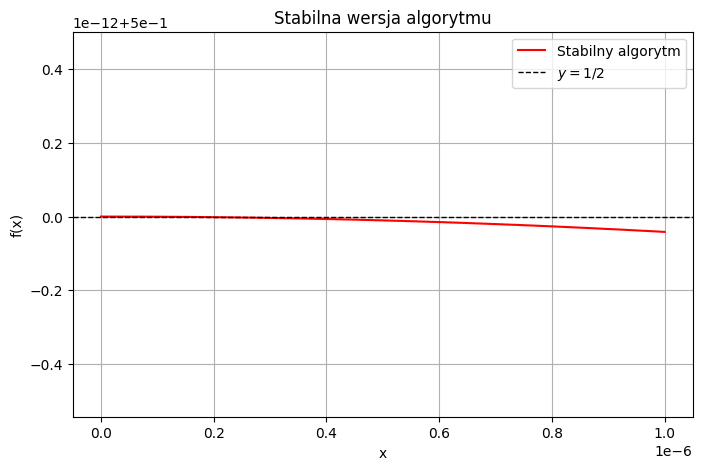

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def stable_function(x):
    return (2 * np.sin(x / 2)**2) / x**2

x_values = np.linspace(1e-10, 1e-6, 1000)
stable_results = stable_function(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, stable_results, label='Stabilny algorytm', color='red')

plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Stabilna wersja algorytmu')


plt.axhline(y=0.5, color='black', linestyle='dashed', linewidth=1, label='$y = \frac{1}{2}$')

plt.legend()
plt.grid()
plt.show()

## **3. Porównanie wyników wersji niestabilnej i stabilnej**

Dla różnych wartości $ x $ porównujemy wyniki funkcji **niestabilnej** i **stabilnej**:

In [65]:
for x in [1e-10, 1e-8, 1e-6, 1e-4]:
    print(f"x = {x}")
    print(f"Niestabilna: {unstable_function(x)}")
    print(f"Stabilna:   {stable_function(x)}")
    print("-")

x = 1e-10
Niestabilna: 0.0
Stabilna:   0.5
-
x = 1e-08
Niestabilna: 0.0
Stabilna:   0.5
-
x = 1e-06
Niestabilna: 0.5000444502911705
Stabilna:   0.4999999999999583
-
x = 0.0001
Niestabilna: 0.4999999969612645
Stabilna:   0.4999999995833334
-


### **Analiza wyników**
- Dla **bardzo małych wartości** $ x $, wersja **niestabilna zwraca 0**, co oznacza całkowitą utratę precyzji wynikającą z **catastrophic cancellation**.  
- Wersja **stabilna** zwraca wartość **bliską $ \frac{1}{2} $**, zgodnie z przewidywaniami analizy Taylora.  
- Przy **większych wartościach** $ x $, wersja niestabilna zaczyna zwracać sensowne wyniki, ale są one **znacznie mniej dokładne** niż w wersji stabilnej.  
- Różnica między wersjami **maleje wraz ze wzrostem $ x $**, ponieważ wpływ catastrophic cancellation staje się mniej znaczący.

### **Wniosek**
Wersja stabilna eliminuje błędy numeryczne wynikające z odejmowania liczb bliskich sobie i pozwala uzyskać **dokładne wartości nawet dla bardzo małych $ x $**. Natomiast wersja niestabilna dla ekstremalnie małych wartości traci precyzję i zwraca **całkowicie błędne wyniki**.